# Analysis of Lin Dyke model sensitivity to variations in storm temporal profile

## Description
Analysis of results of running 6hr duration, 1-in-100 year rainfall events through Hec-Ras model of Lin Dyke catchment. These include 15 observed profiles and FEH single peak profile.

## Overview of conclusions
1. The same proportion of urban and non-urban cells are affected by flooding in each rainfall scenario.   
2.	Within the 15 observed profiles there is considerable variation in the flooded area. There is a max difference between scenarios of 17% (with one being 7% lower than the FEH and other being 9% higher). 
3.	There is a relationship between the magnitude of the peak intensity and the total flooded area (and a much weaker relationship between the minute of the peak intensity and the flooded area). There is no relationship between the minute of peak intensity and the magnitude of peak intensity.
4.	There is also between scenario variation in the proportion of the flooded cells which fall within the different depth/velocity/hazard categories.
5.	Relationships seem to exist between the proportion of the flooded area in these different categories and the magnitude of the peak intensity/minute in which the peak occurs (but need to think further on how to capture this). 
6. More front loaded profiles have an earlier peak, and also generally a lower peak. 

In [1]:
import os
from pathlib import Path
from PIL import Image
# import geopandas as gpd
import itertools
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import sys 

os.chdir("IdealisedProfiles")
from my_functions_idealisedprofiles import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define whether to filter out values <0.1
remove_little_values = True


def plot_totals_area_comparisons(cluster_results, kippax_cluster_results,garforth_cluster_results, short_ids, titles,title, 
                                 patches, urban = True):

    fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (28,7))
    y_pos = np.arange(len(cluster_results['Cluster_num']))

    xlocs, xlabs = plt.xticks(y_pos)
    xlocs=[i+1 for i in range(0,19)]
    xlabs=[i/2 for i in range(0,19)]
    
    if urban == True:
        column_to_plot = 'UrbanFloodedArea'
        column_to_text = '%Diff_UrbanFloodedArea_fromSP_formatted'
    else:
        column_to_plot = 'TotalFloodedArea'
        column_to_text = '%Diff_FloodedArea_fromSP_formatted'
        
    for ax_num, cluster_results_df in enumerate([cluster_results, kippax_cluster_results,garforth_cluster_results]):
        
        
        ##############################
        # Plot number of flooded cells
        ##############################
        if urban== True:
            axs[ax_num].bar(y_pos, cluster_results_df[column_to_plot].values.tolist(), width = 0.9, color = cluster_results_df['colour'])
        else:
            axs[ax_num].bar(y_pos, cluster_results_df[column_to_plot].values.tolist(), width = 0.9, color = cluster_results_df['colour'])
        
        # Create names on the x-axis
        axs[ax_num].set_xticks(y_pos)
        axs[ax_num].set_xticklabels(short_ids, fontsize =10, rotation = 75)
        axs[ax_num].set_ylabel('Flooded area (km2)', fontsize =20)
        axs[ax_num].tick_params(axis='both', which='major', labelsize=15)
        axs[ax_num].set_title(titles[ax_num], fontsize = 20, x=0.5, y=1.17)
        
        # Add text with percentages
        for i, v in enumerate(cluster_results_df[column_to_plot].values.tolist()):
            axs[ax_num].text(xlocs[i] - 1.2, v * 1.025, str(cluster_results_df[column_to_text][i]), 
                        fontsize = 20, rotation =90)
    
    # Make legend
    plt.legend(handles=patches, bbox_to_anchor=(1.18, 0.55), loc='center', ncol=1, prop={'size': 19} )  
    fig.suptitle(title, fontsize = 35, x=0.5, y=1.17)

### Define the names of the method (shorter and longer versions)

In [2]:
methods =['6h_sp_c_0.5','6h_sp_fl_0.1', '6h_sp_fl_0.2', '6h_sp_fl_0.3', '6h_sp_fl_0.4',
          '6h_sp_bl_0.6','6h_sp_bl_0.7','6h_sp_bl_0.8','6h_sp_bl_0.9']
short_ids_by_loading_df = pd.DataFrame({'short_id':methods, 'loading':['C']+['F2']*2 + ['F1']*2 + ['B1']*2+ ['B2']*2 })

### Read in summary results from Processing-2.ipynb script

In [3]:
cluster_results= pd.read_csv("Data/allclusters_summary.csv")
kippax_cluster_results= pd.read_csv("Data/Kippaxallclusters_summary.csv")
garforth_cluster_results= pd.read_csv("Data/Garforthallclusters_summary.csv")

In [4]:
colors = ['darkblue', 'paleturquoise', 'grey', 'indianred', 'darkred']
texts = ['F2','F1','C', 'B1', 'B2'] 
patches1 = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]

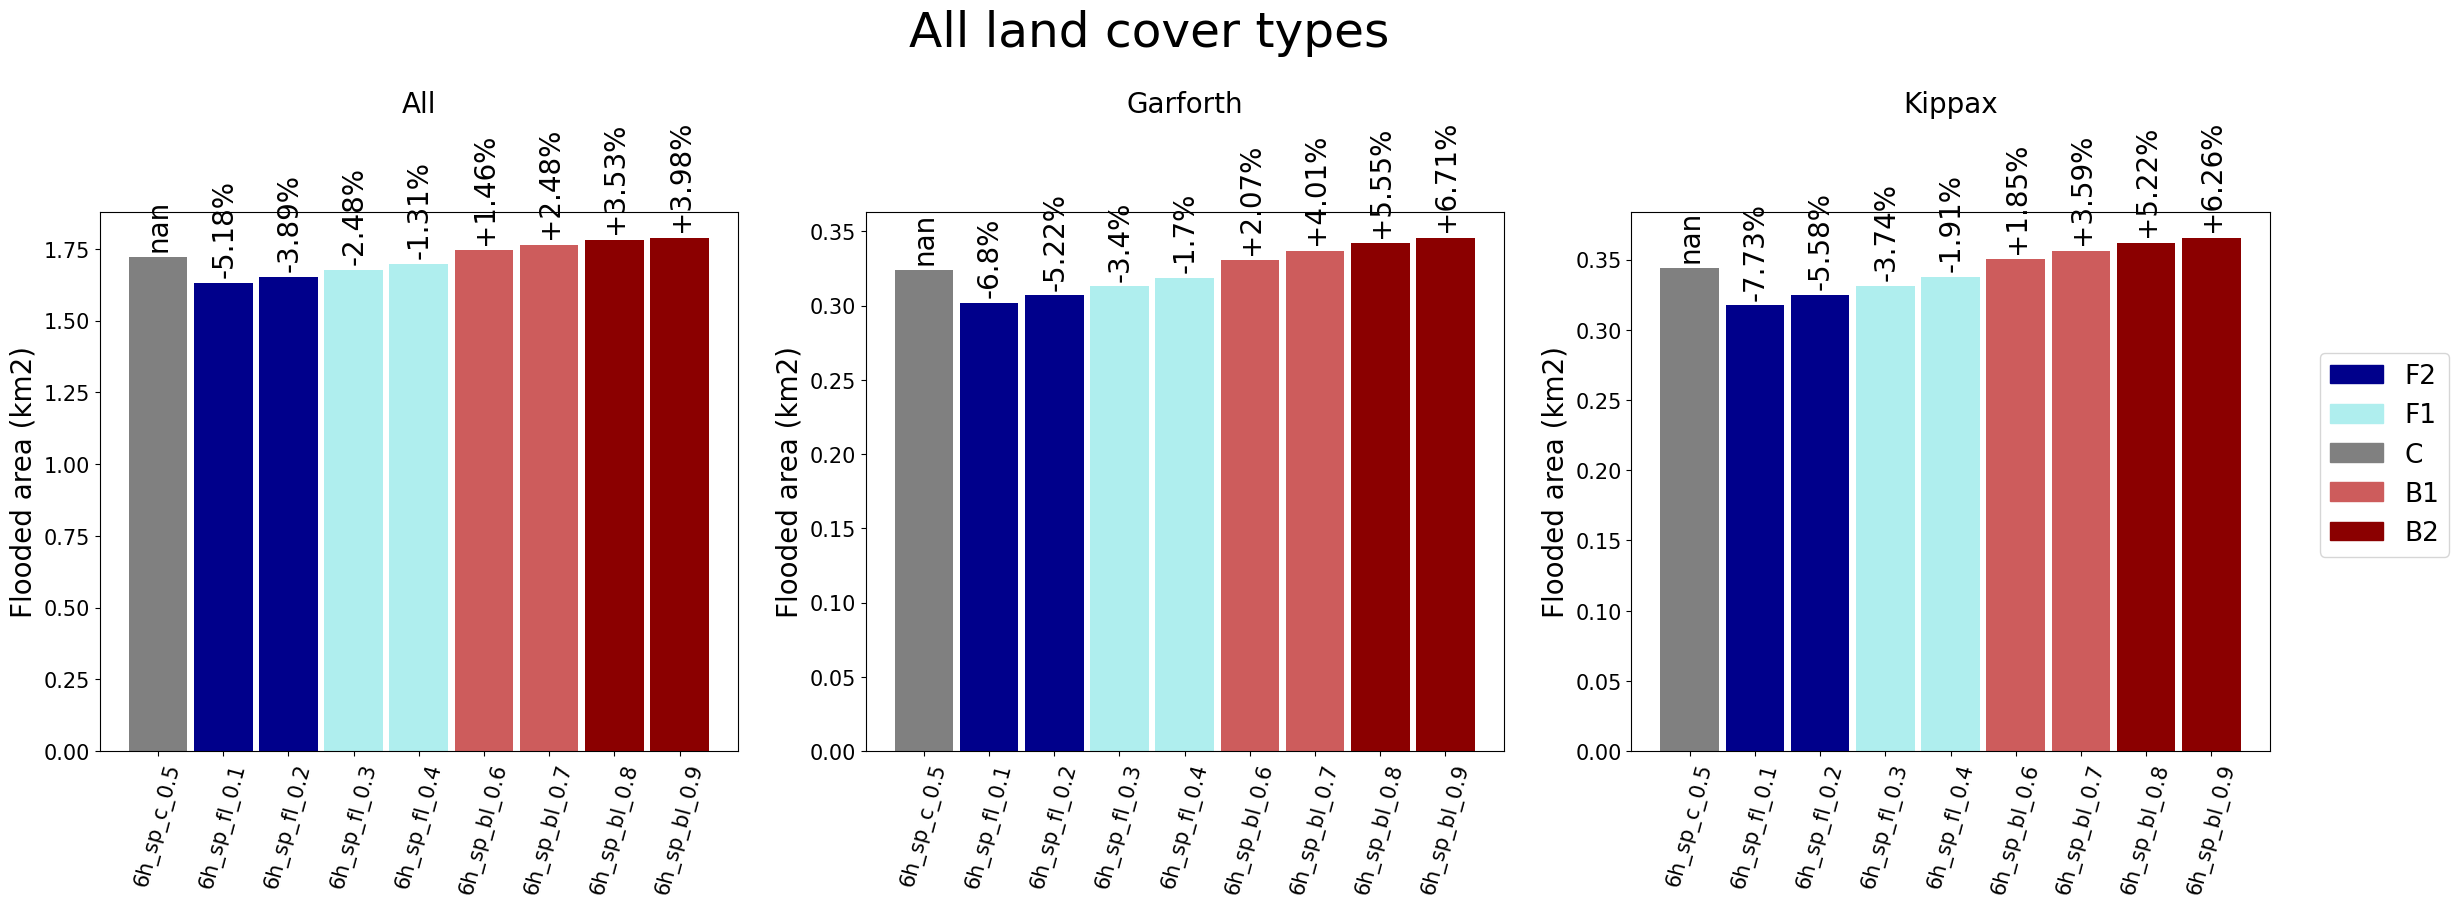

In [6]:
plot_totals_area_comparisons(cluster_results,garforth_cluster_results,kippax_cluster_results,methods, 
                             ['All', 'Garforth','Kippax'],'All land cover types',patches1, False)

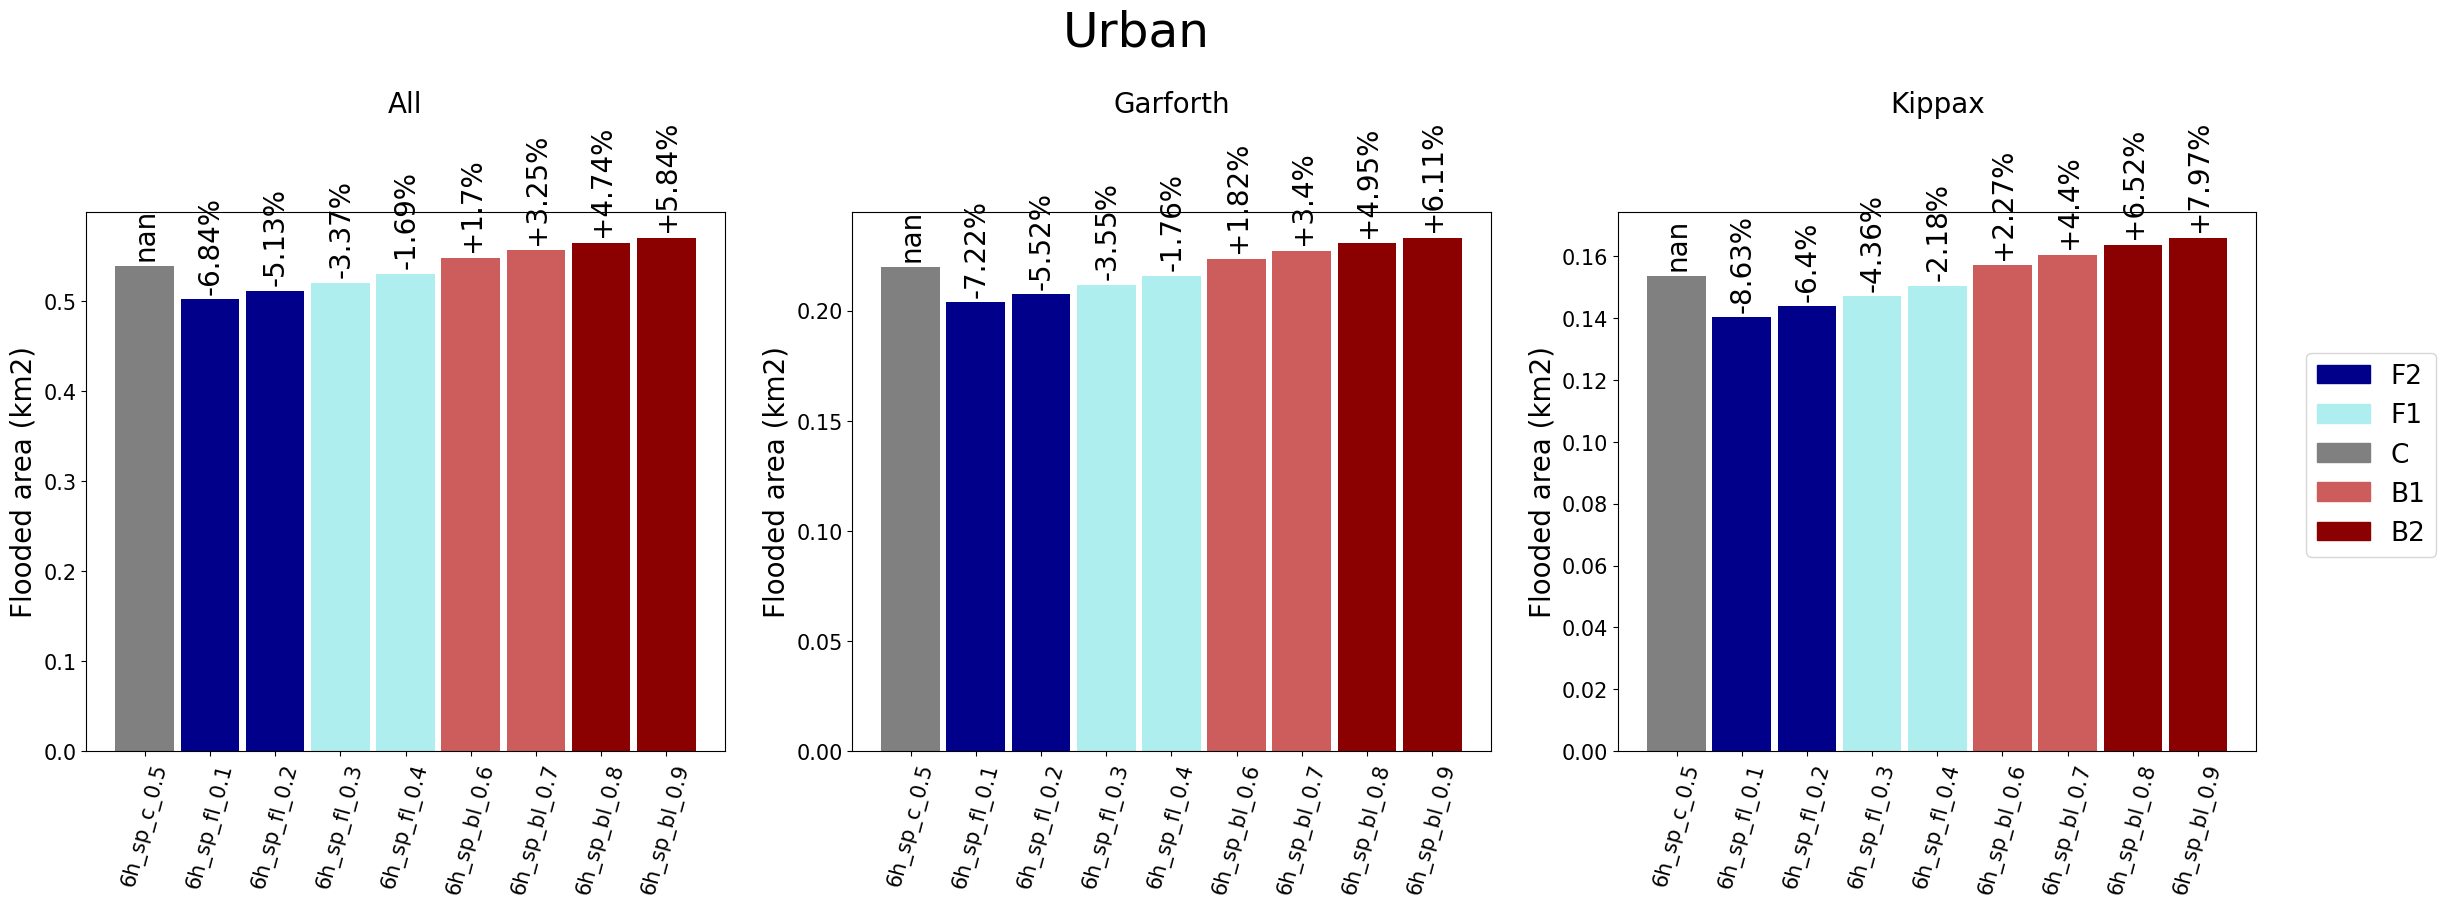

In [7]:
plot_totals_area_comparisons(cluster_results,garforth_cluster_results,kippax_cluster_results,methods,  
                                         ['All', 'Garforth','Kippax'],'Urban', patches1,True)

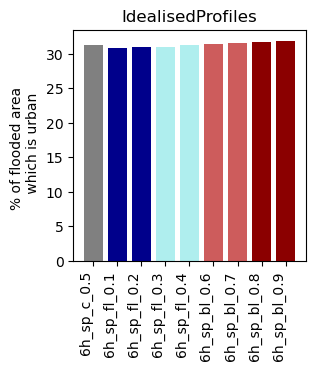

In [9]:
cluster_results['%_of_urban_area_flooded'] =(cluster_results['UrbanFloodedArea']/7.987)*100
cluster_results['%floodedarea_urban'] = round(cluster_results['UrbanFloodedArea']/cluster_results['TotalFloodedArea']*100,2)
fig, axs = plt.subplots(figsize =(3,3))
axs.bar(cluster_results['Cluster_num'],cluster_results['%floodedarea_urban'], color = cluster_results['colour'] )
axs.set_ylabel("% of flooded area \n which is urban")
axs.xaxis.set_ticks(range(0,len(cluster_results['Cluster_num'])))
axs.set_xticklabels(cluster_results['Cluster_num'], rotation=90, ha='right')
plt.title("IdealisedProfiles");

In [11]:
cluster_results['%_of_urban_area_flooded']

0    6.740829
1    6.280043
2    6.394992
3    6.513560
4    6.627119
5    6.855440
6    6.959684
7    7.060273
8    7.134656
Name: %_of_urban_area_flooded, dtype: float64

# Idealised profiles (scaled)

In [83]:
cluster_results= pd.read_csv("../IdealisedProfiles_Scaled/Data/allclusters_summary.csv")
kippax_cluster_results= pd.read_csv("../IdealisedProfiles_Scaled/Data/Kippaxallclusters_summary.csv")
garforth_cluster_results= pd.read_csv("../IdealisedProfiles_Scaled/Data/Garforthallclusters_summary.csv")

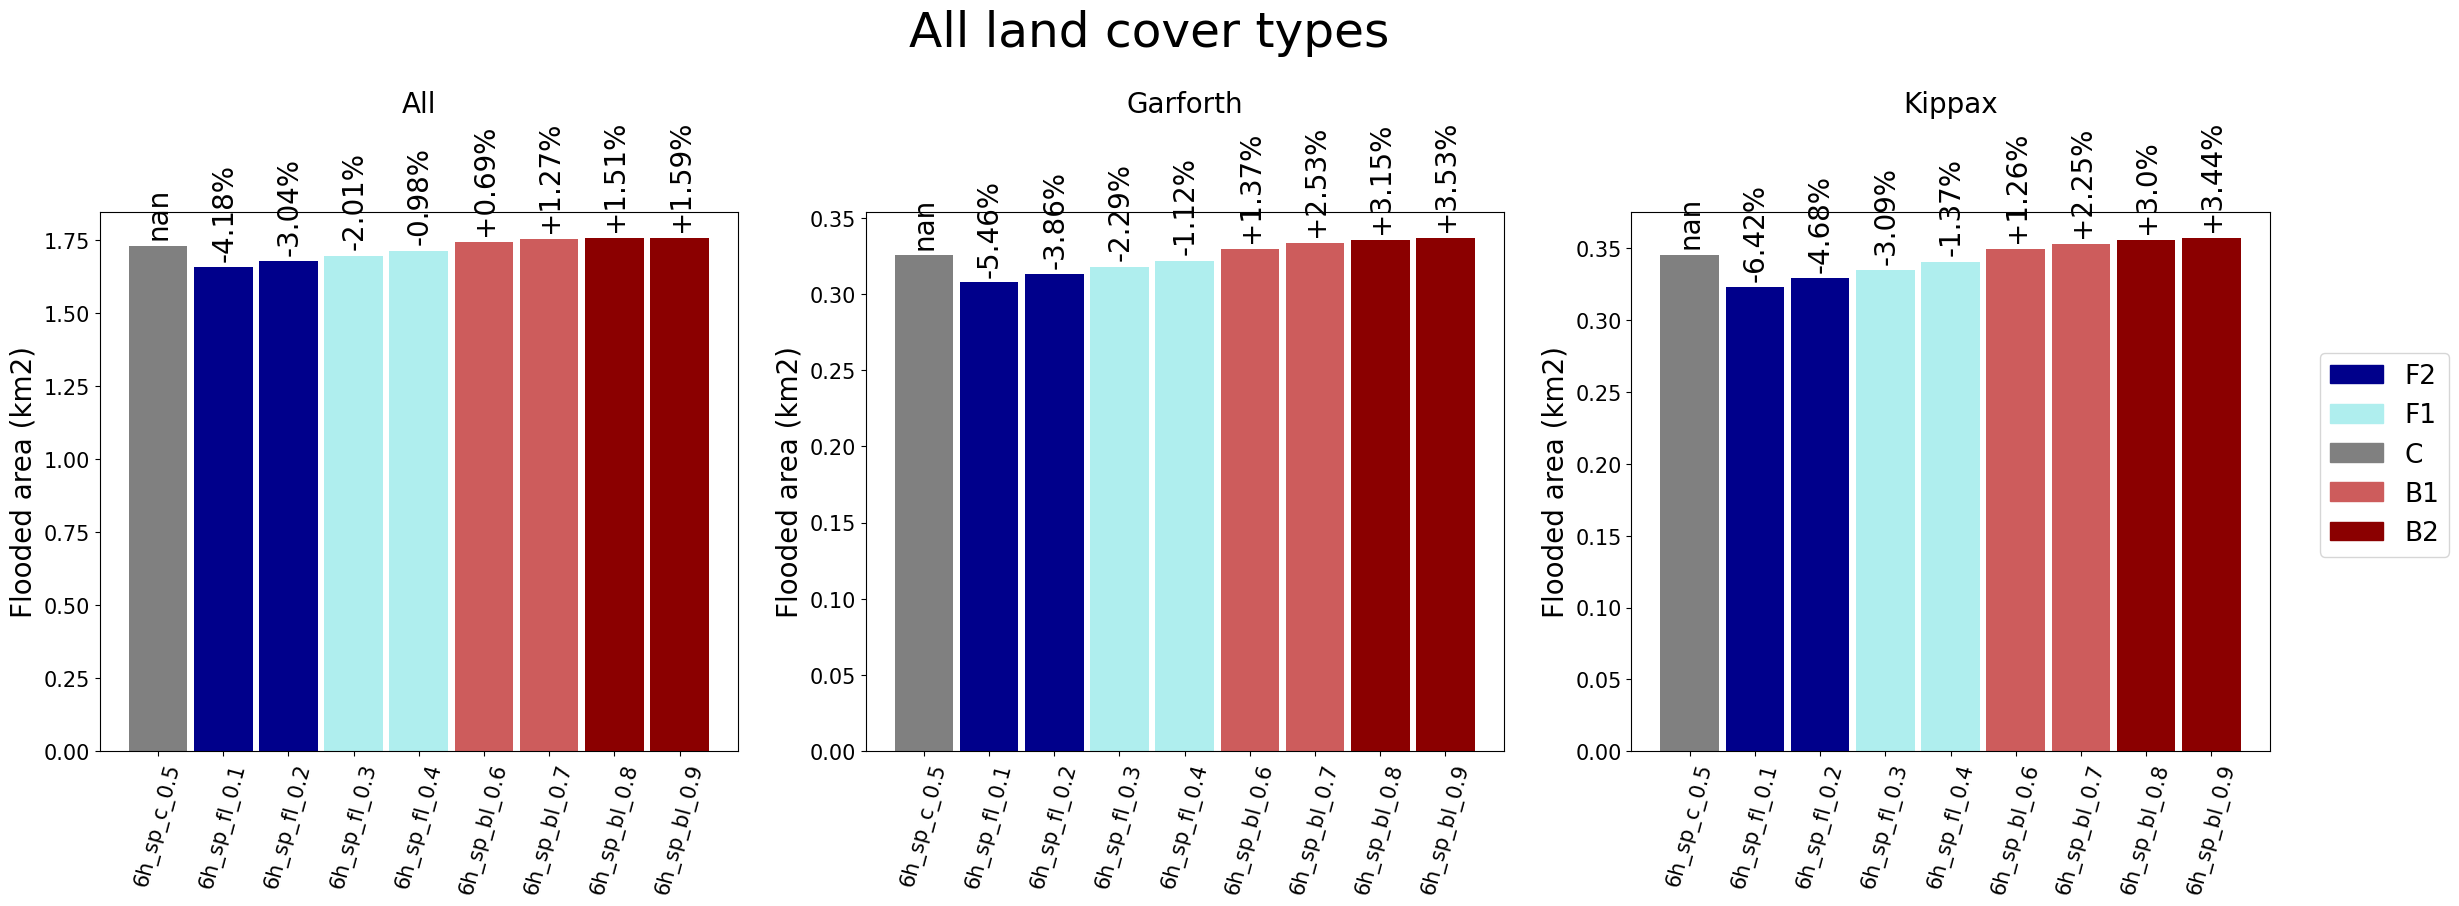

In [84]:
plot_totals_area_comparisons(cluster_results,garforth_cluster_results,kippax_cluster_results,methods, 
                             ['All', 'Garforth','Kippax'],'All land cover types',patches, False)

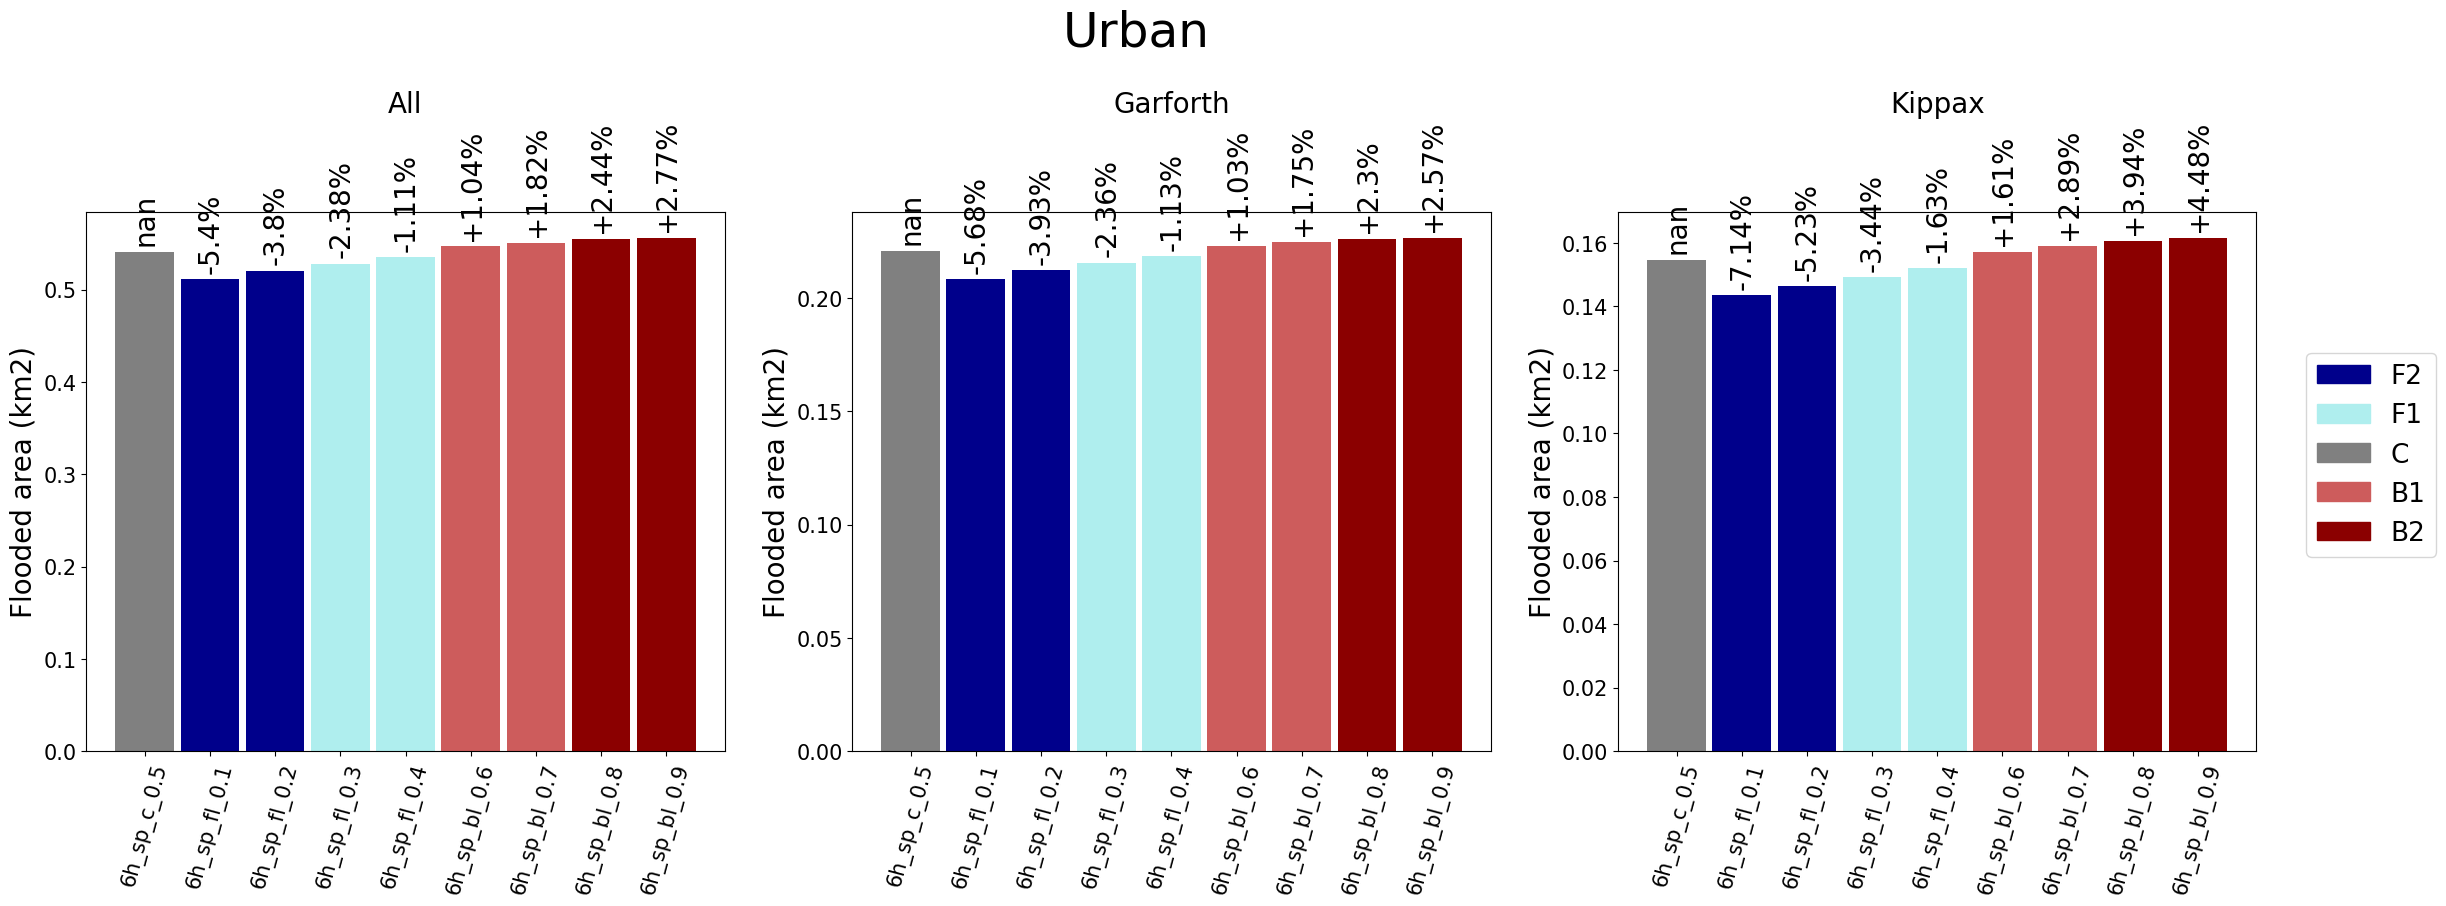

In [85]:
plot_totals_area_comparisons(cluster_results,garforth_cluster_results,kippax_cluster_results,methods,  
                                         ['All', 'Garforth','Kippax'],'Urban',patches, True)

# Single peak (scaled)

In [92]:
cluster_results= pd.read_csv("../SinglePeak_Scaled/Data/allclusters_summary.csv")
cluster_results['colour'] =['#73d273', '#56b756', '#3a9b3a', '#1d801d', '#006400']
kippax_cluster_results= pd.read_csv("../SinglePeak_Scaled/Data/Kippaxallclusters_summary.csv")
kippax_cluster_results['colour'] =['#73d273', '#56b756', '#3a9b3a', '#1d801d', '#006400']
garforth_cluster_results= pd.read_csv("../SinglePeak_Scaled/Data/Garforthallclusters_summary.csv")
garforth_cluster_results['colour']=['#73d273', '#56b756', '#3a9b3a', '#1d801d', '#006400']

In [98]:
colors = ['#73d273', '#56b756', '#3a9b3a', '#1d801d', '#006400']
patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(methods[i]) ) for i in range(len(methods)) ]

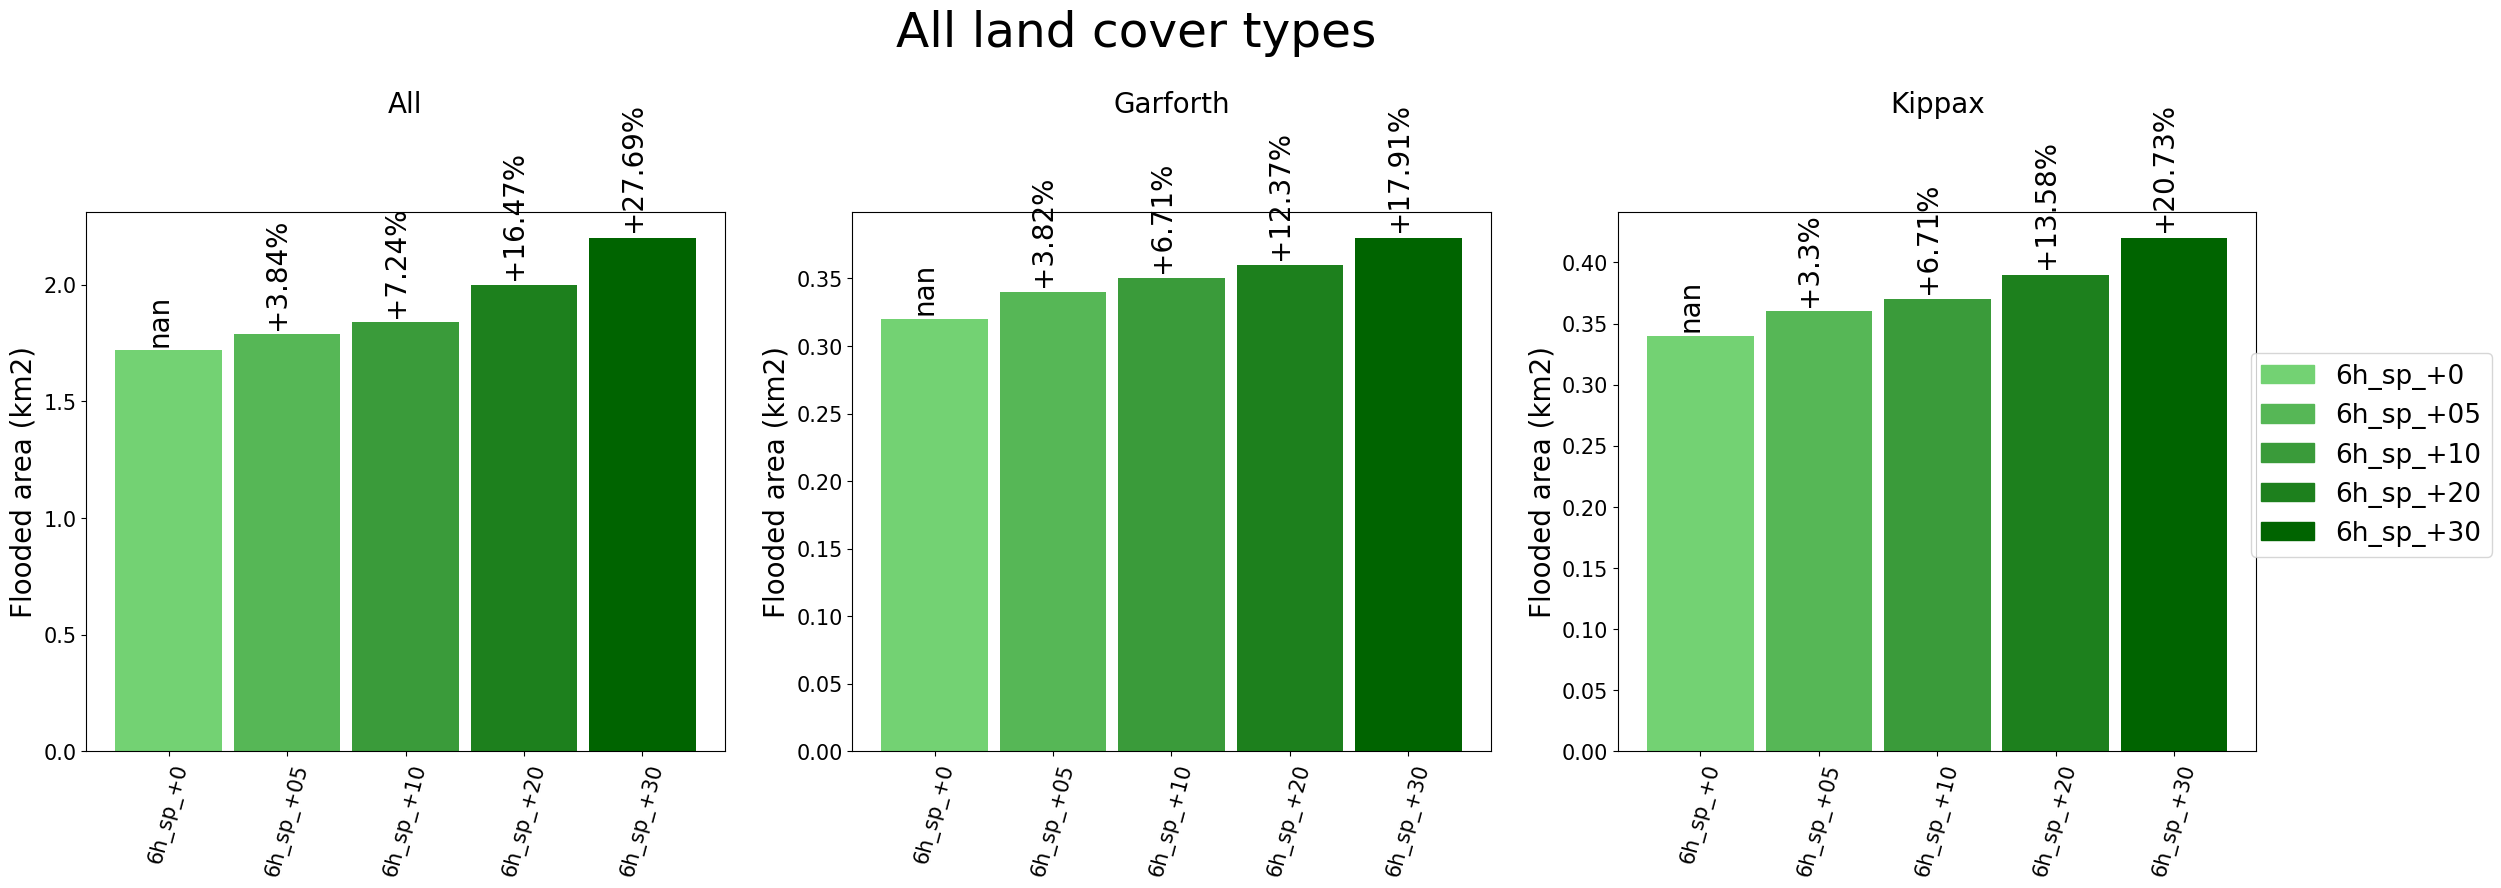

In [102]:
methods = ['6h_sp_+0','6h_sp_+05','6h_sp_+10','6h_sp_+20','6h_sp_+30']   
plot_totals_area_comparisons(cluster_results,garforth_cluster_results,kippax_cluster_results,methods, 
                             ['All', 'Garforth','Kippax'],'All land cover types', patches, False)

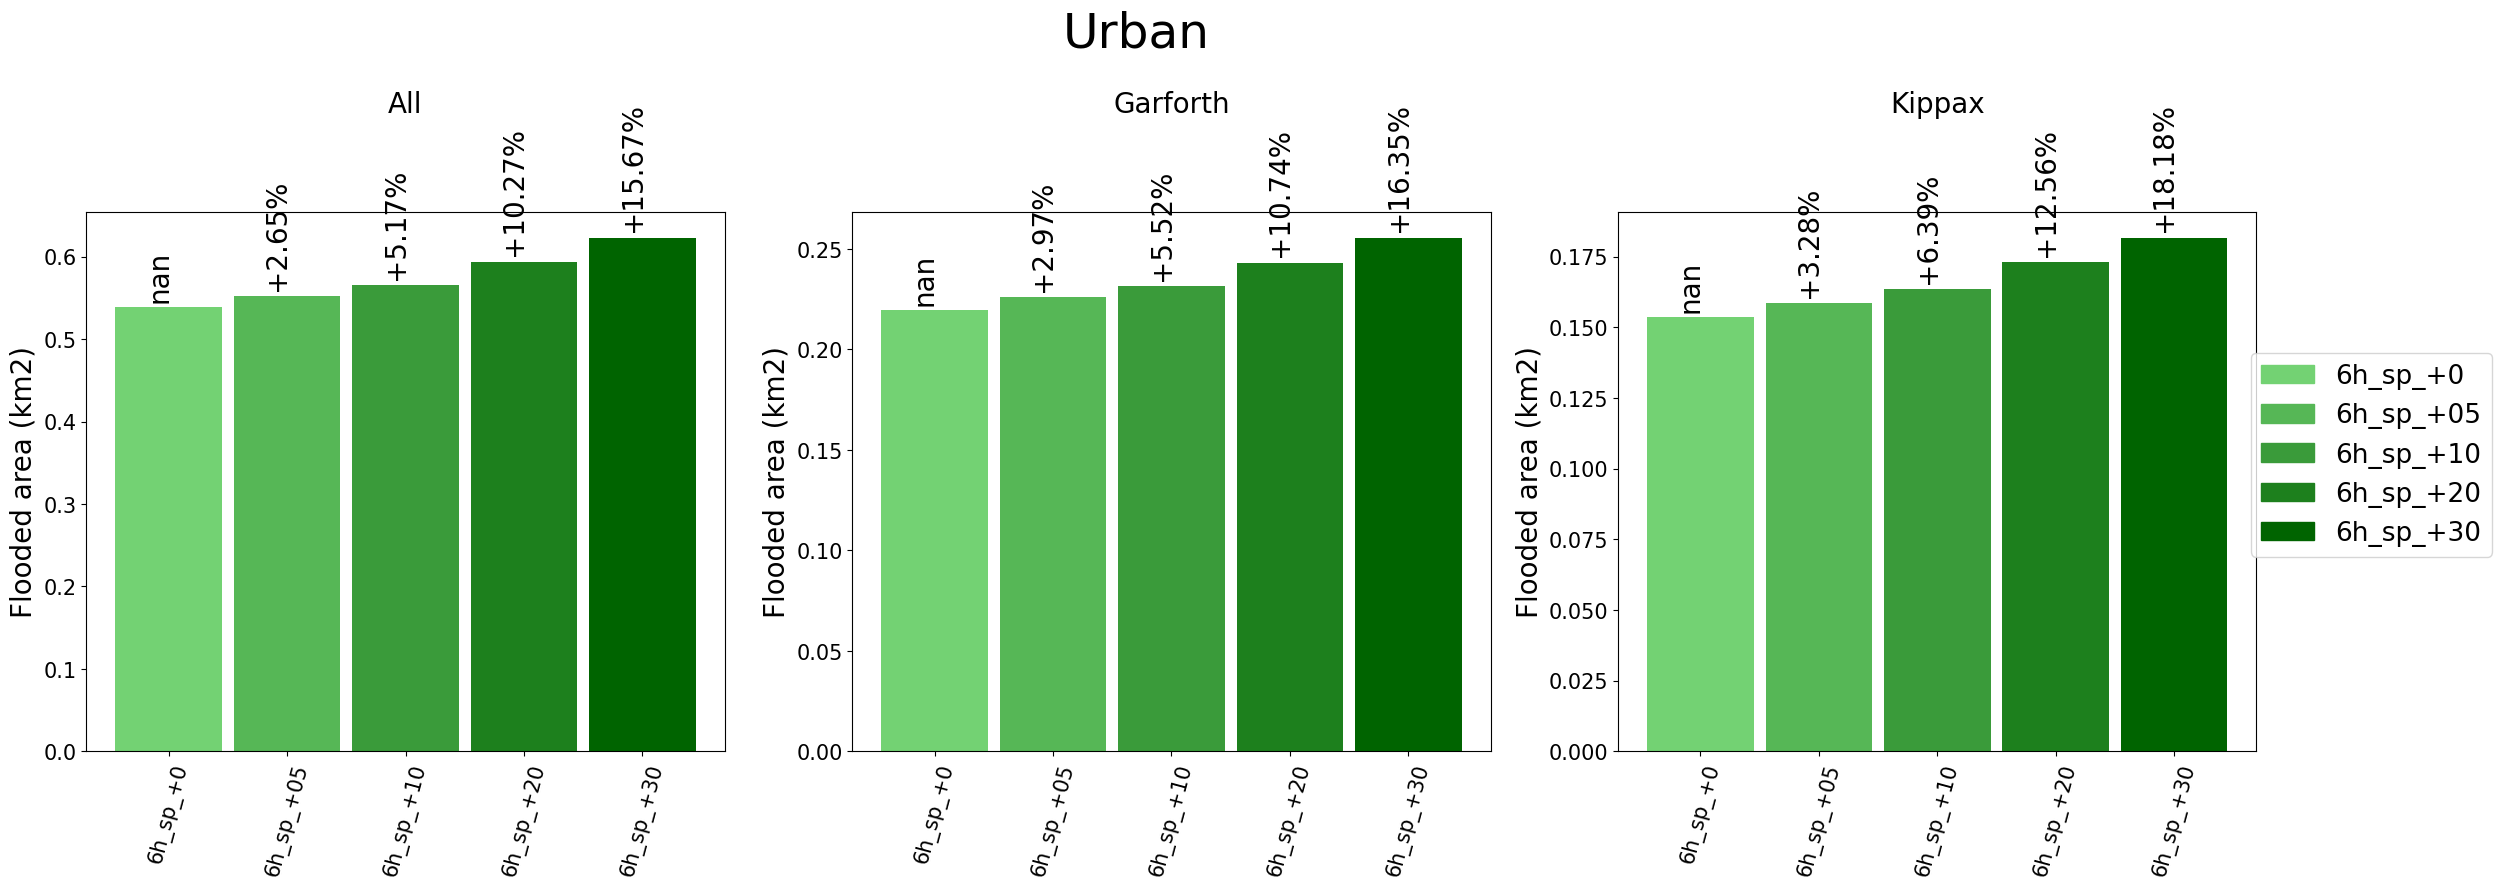

In [104]:
plot_totals_area_comparisons(cluster_results,garforth_cluster_results,kippax_cluster_results,methods,  
                                         ['All', 'Garforth','Kippax'],'Urban', patches, True)

# Observed profiles

In [34]:
def order_cluster_results (fp):
    df = pd.read_csv(fp)
    df = df.sort_values(by='MaxRainfallIntensityMinute',ascending= True)
    df = pd.concat([df[df['Cluster_num']== "6h_feh_sp"],  df[df['Cluster_num'] != "6h_feh_sp"]])
    df.reset_index(inplace=True)
    df=df.fillna('')
    return df

cluster_results= order_cluster_results("../ObservedProfiles/Data/allclusters_summary.csv")
kippax_cluster_results= order_cluster_results("../ObservedProfiles/Data/Kippaxallclusters_summary.csv")
garforth_cluster_results= order_cluster_results("../ObservedProfiles/Data/Garforthallclusters_summary.csv")

In [35]:
short_ids = ['6h_feh_singlepeak', '6h_c1','6h_c2','6h_c3','6h_c4', '6h_c5', '6h_c6','6h_c7',
            '6h_c8','6h_c9', '6h_c10', '6h_c11','6h_c12','6h_c13','6h_c14', '6h_c15'] 

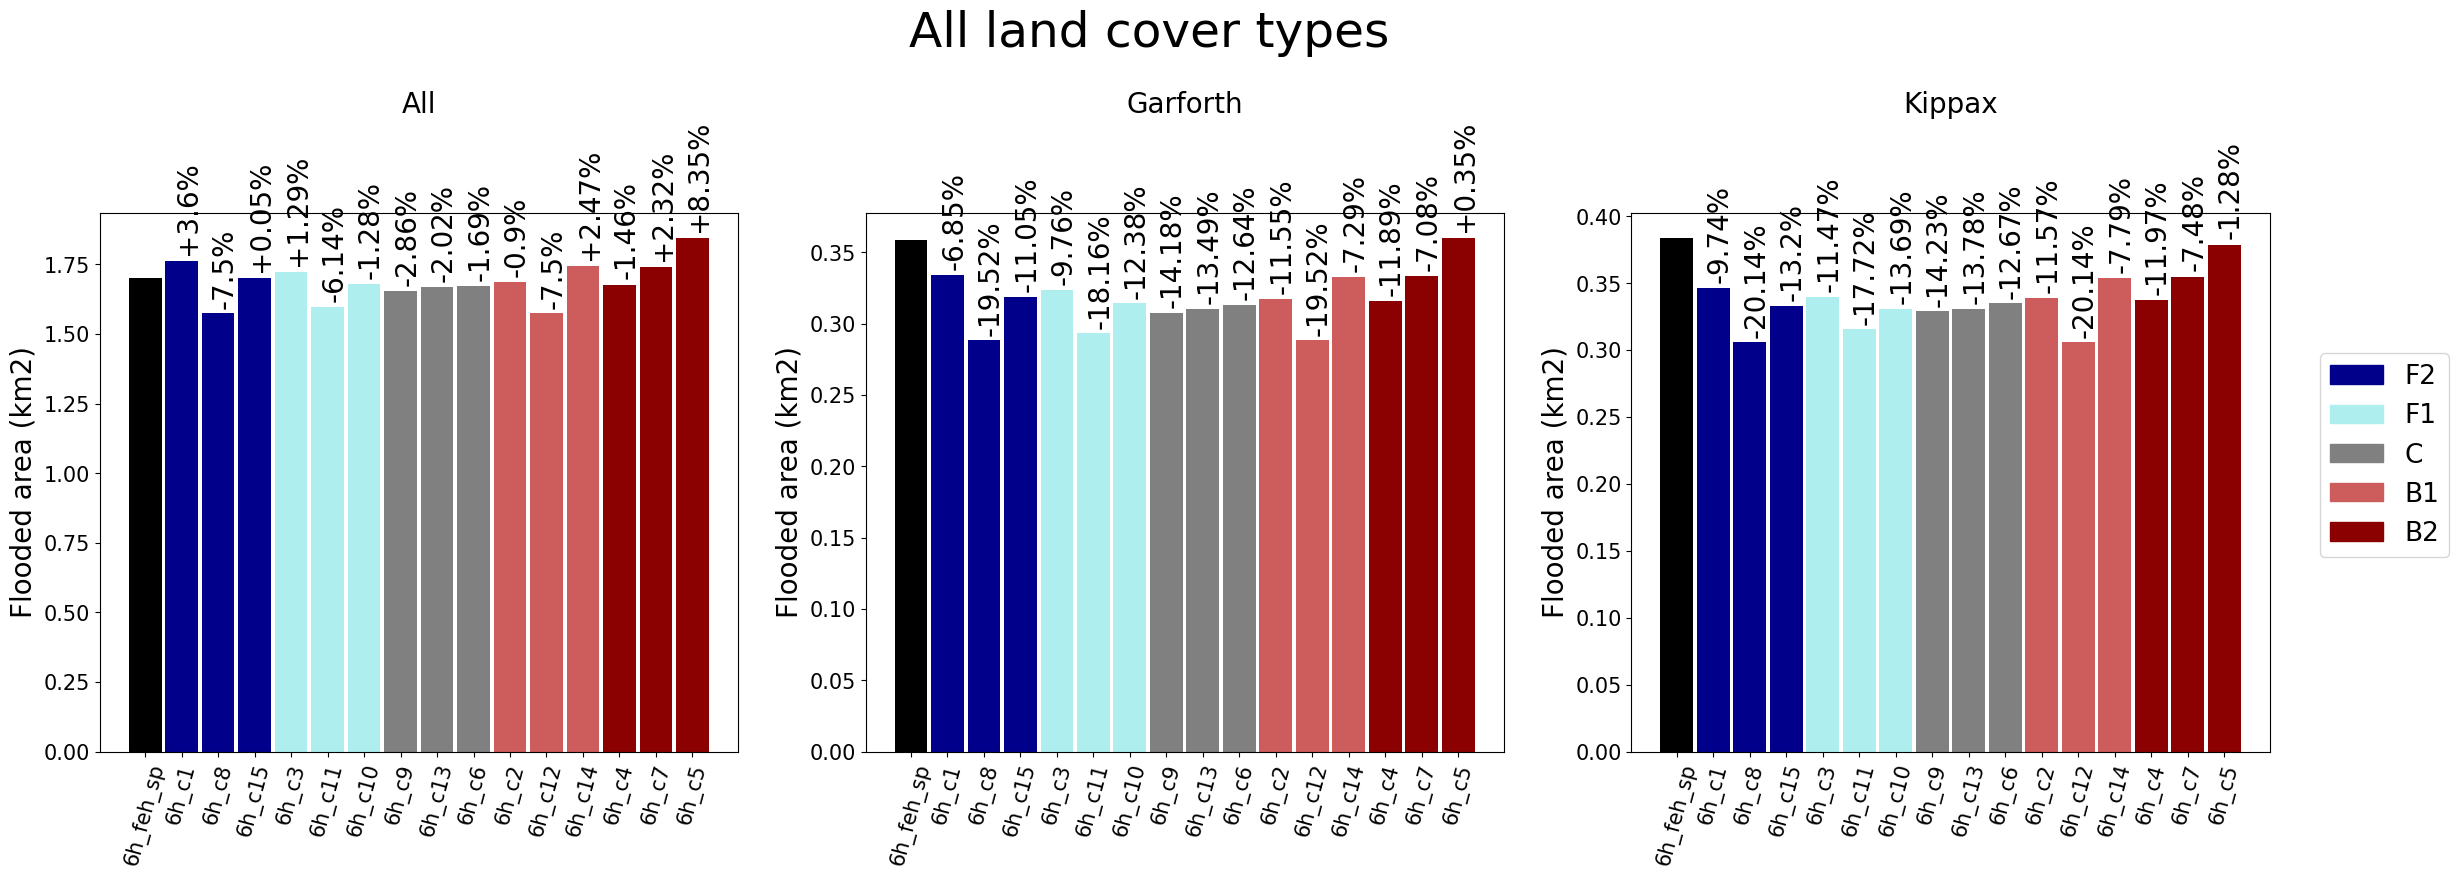

In [36]:
plot_totals_area_comparisons(cluster_results,garforth_cluster_results,kippax_cluster_results,cluster_results['Cluster_num'], 
                             ['All', 'Garforth','Kippax'],'All land cover types', patches1, False)

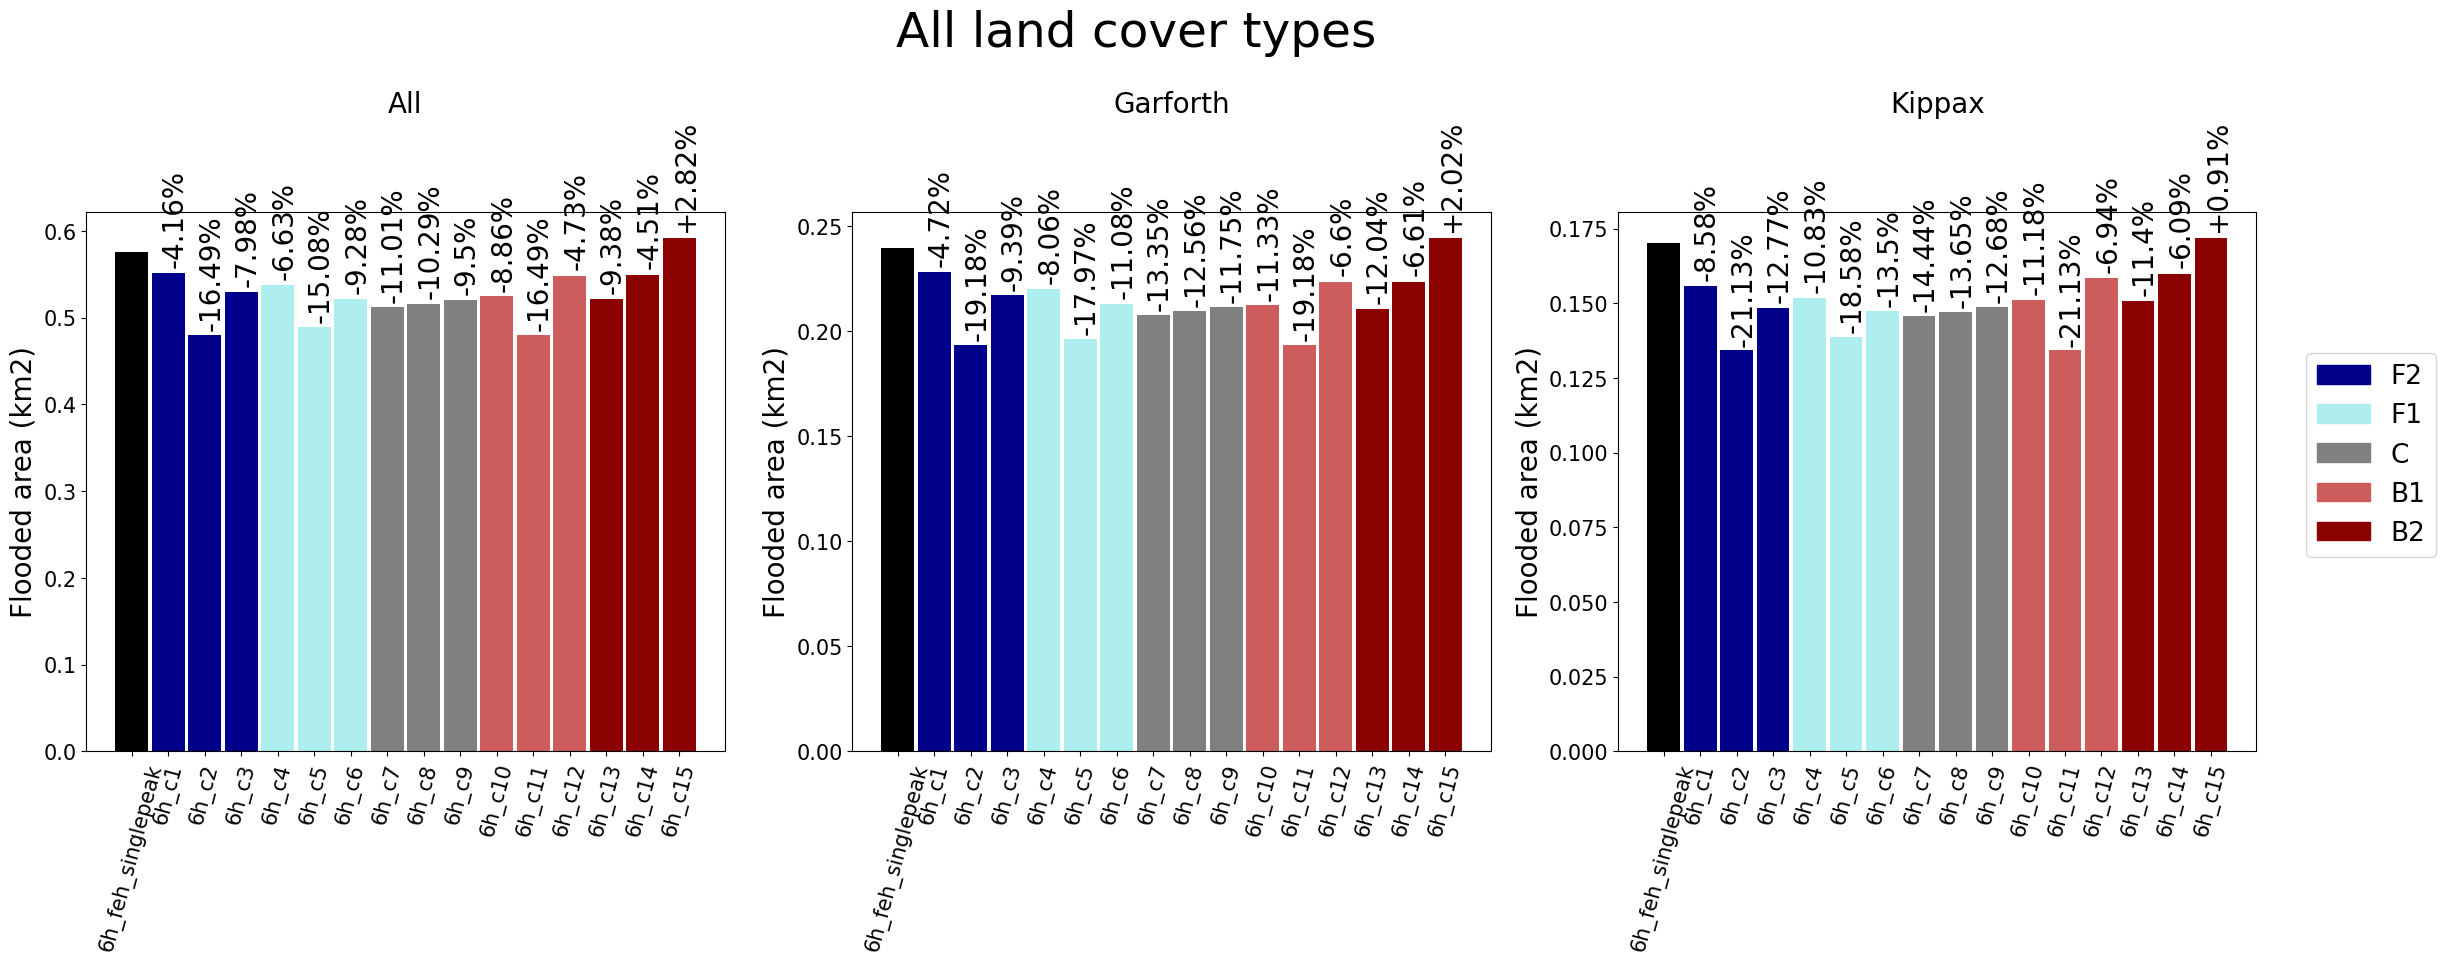

In [37]:
plot_totals_area_comparisons(cluster_results,garforth_cluster_results,kippax_cluster_results,short_ids, 
                             ['All', 'Garforth','Kippax'],'All land cover types', patches1, True)